<a href="https://colab.research.google.com/github/ShivajiMallela/Deep-learning-with-Tensorflow/blob/main/3_introduction_to_CNN_and_Computer_vision_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

Up to this point, we've learned the basics of TensorFlow and created several models to tackle various problems.

Now, let's dive deeper into how a specific type of neural network, [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network), can be employed for computer vision tasks (identifying patterns in visual data).

> 🔑 **Note:** In deep learning, there are various model architectures suited for different tasks. For instance, you can use a convolutional neural network for predicting outcomes based on image or text data. Nonetheless, some architectures generally perform better for certain tasks.

For example, you may want to:
* Determine if an image of food contains pizza 🍕 or steak 🥩 (we'll be doing this)
* Detect the presence of an object in an image (e.g., identify if a specific car passed through a security camera)

In this notebook, we'll continue with the TensorFlow modeling workflow we've been using while learning how to build and apply CNNs.

## What we'll cover

Specifically, we'll go through the following with TensorFlow:

- Obtaining a dataset to work with
- Understanding the architecture of a convolutional neural network
- A quick end-to-end example (our goal)
- Steps for modeling binary image classification with CNNs:
  - Getting familiar with the data
  - Preparing data for modeling
  - Building a CNN model (starting with a baseline)
  - Training the model (teaching it to recognize patterns in our data)
  - Evaluating the model
  - Enhancing the model
  - Making predictions with a trained model
- Steps for modeling multi-class image classification with CNNs:
  - Following similar steps as above but with a different dataset.


## Get the data

Since convolutional neural networks excel at processing images, we'll begin by working with an image dataset to understand them better.

We'll use images from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), which includes 101 categories of food dishes with a total of 101,000 real-world images (1,000 images per category).

For this example, we'll focus on two categories: pizza 🍕 and steak 🥩, and build a binary classifier.

> 🔑 **Note:** The data we're using has already been preprocessed by @mdbourke (My instructor of deep learning course on udemy) , including steps like organizing the images into different folders. You can view these preprocessing steps in his notebook uploaded in github [the preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

We'll start by downloading the `pizza_steak` subset .zip file and extracting its contents.

In [ ]:
import zipfile

# Download zip file of pizza steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-06-28 17:36:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.207, 142.251.184.207, 173.194.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  99.3MB/s    in 1.1s    

2024-06-28 17:36:25 (99.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



> 🔑 **Note:** If you're using Google Colab and your runtime disconnects, you may have to redownload the files. You can do this by rerunning the cell above.

## Inspect the data (become one with it)

An essential step at the beginning of any machine learning project is thoroughly understanding the data. This often involves a lot of visualization and exploring the folders to grasp the data you’ll be working with.

With that in mind, let’s examine the data we just downloaded.

The file structure is organized in a common format used for image datasets.

Specifically:
* A `train` directory containing all the training images, with subdirectories named after each class, holding images of that class.
* A `test` directory with the same structure as the `train` directory.

```
Example of file structure:

pizza_steak <- top-level folder
└───train <- training images
│ └───pizza
│ │ │ 1008104.jpg
│ │ │ 1638227.jpg
│ │ │ ...
│ └───steak
│ │ 1000205.jpg
│ │ 1647351.jpg
│ │ ...
│
└───test <- testing images
│ └───pizza
│ │ │ 1001116.jpg
│ │ │ 1507019.jpg
│ │ │ ...
│ └───steak
│ │ 100274.jpg
│ │ 1653815.jpg
│ │ ...
```

Let’s take a look at each of the directories we've downloaded.

To do this, we can use the command `ls` (short for list).


In [ ]:
!ls pizza_steak

test  train


We can see we got `train` and `test` foler.

Let's see what's inside one of them.

In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/test/steak

100274.jpg   148595.jpg   2138503.jpg  2752603.jpg  3173402.jpg  3873655.jpg  66858.jpg
1012080.jpg  1498778.jpg  2144308.jpg  2756200.jpg  321090.jpg	 3901703.jpg  670345.jpg
1016217.jpg  1499273.jpg  219196.jpg   2772358.jpg  3235645.jpg  3903517.jpg  673127.jpg
1064847.jpg  1515274.jpg  2193535.jpg  277297.jpg   324862.jpg	 3905395.jpg  690177.jpg
1082384.jpg  1523026.jpg  2198931.jpg  2802460.jpg  3293212.jpg  391144.jpg   690477.jpg
108310.jpg   1627703.jpg  221604.jpg   2814314.jpg  3293650.jpg  39461.jpg    697562.jpg
1094883.jpg  1653815.jpg  2229090.jpg  281731.jpg   3297938.jpg  399377.jpg   7056.jpg
1107549.jpg  1655387.jpg  2246332.jpg  2821155.jpg  3315737.jpg  400530.jpg   717293.jpg
1118585.jpg  1662212.jpg  2276476.jpg  2824517.jpg  3343970.jpg  400951.jpg   721500.jpg
1163050.jpg  168551.jpg   2285106.jpg  2825105.jpg  3352834.jpg  401660.jpg   730464.jpg
1166047.jpg  1687010.jpg  228683.jpg   284097.jpg   3383942.jpg  40947.jpg    746921.jpg
1190808.jpg  1718949.jpg  

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Get the class names programatically, (this is much more helpful with a longer list of class)
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train/') #turn our training path into a python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Visualize the images

In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #set up target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder +'/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}") #shape of the image

  return img

Image shape: (382, 512, 3)


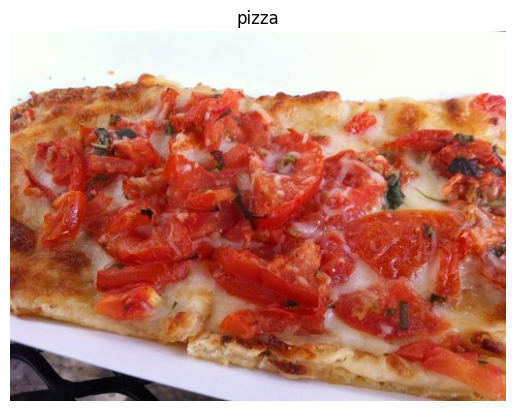

In [ ]:
img = view_random_image('pizza_steak/train/', 'pizza');

Image shape: (512, 512, 3)


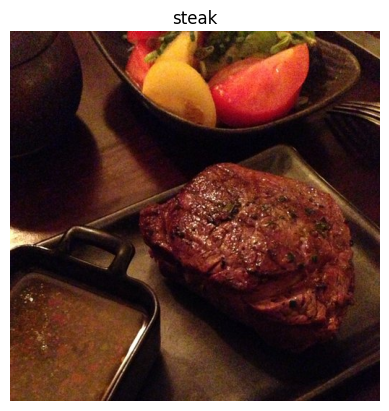

In [ ]:
view_random_image('pizza_steak/train/', 'steak');

array([[[250, 255, 248],
        [250, 255, 248],
        [250, 255, 248],
        ...,
        [162, 167, 161],
        [153, 158, 152],
        [149, 154, 148]],

       [[250, 255, 248],
        [250, 255, 248],
        [250, 255, 248],
        ...,
        [244, 249, 243],
        [242, 247, 241],
        [241, 246, 240]],

       [[250, 255, 248],
        [250, 255, 248],
        [250, 255, 248],
        ...,
        [252, 255, 251],
        [252, 255, 251],
        [252, 255, 251]],

       ...,

       [[ 20,  10,  18],
        [ 20,  13,  20],
        [ 22,  15,  23],
        ...,
        [193, 113,  64],
        [195, 116,  60],
        [190, 111,  54]],

       [[ 24,  17,  24],
        [ 25,  18,  25],
        [ 25,  18,  26],
        ...,
        [195, 121,  72],
        [199, 126,  71],
        [196, 124,  66]],

       [[ 28,  21,  28],
        [ 28,  21,  28],
        [ 27,  22,  29],
        ...,
        [203, 133,  82],
        [201, 130,  76],
        [199, 129,  70]]], dtype=uint8)
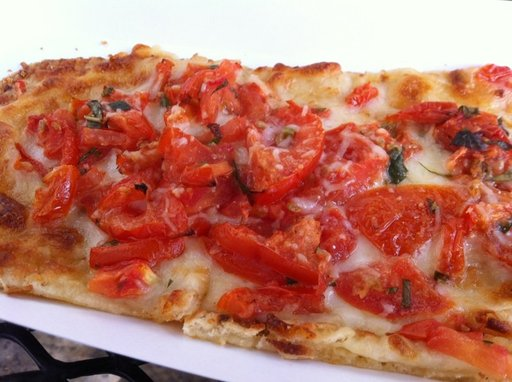

In [ ]:
# view the img (actually just a big array/tensor)
img

In [ ]:
img.shape # returns (width, height, colour channels)

(382, 512, 3)

Examining the image shape more closely, you’ll notice it's in the format `(Width, Height, Color Channels)`.

In our case, the width and height vary, but since we’re working with color images, the color channels value is always 3, representing the different values of [red, green, and blue (RGB) pixels](https://en.wikipedia.org/wiki/RGB_color_model).

You’ll see that all the values in the `img` array range between 0 and 255. This is because 0 to 255 is the possible range for red, green, and blue values.

For instance, a pixel with a value `red=0, green=0, blue=255` will appear very blue.

So, when we build a model to differentiate between our images of `pizza` and `steak`, it will identify patterns in these different pixel values that define each class.

> 🔑 **Note:** As we’ve mentioned earlier, many machine learning models, including neural networks, perform better when the values they work with are between 0 and 1. Therefore, one of the most common preprocessing steps for image data is to **scale** (also known as **normalize**) the pixel values by dividing the image arrays by 255.


In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.98039216, 1.        , 0.97254902],
        [0.98039216, 1.        , 0.97254902],
        [0.98039216, 1.        , 0.97254902],
        ...,
        [0.63529412, 0.65490196, 0.63137255],
        [0.6       , 0.61960784, 0.59607843],
        [0.58431373, 0.60392157, 0.58039216]],

       [[0.98039216, 1.        , 0.97254902],
        [0.98039216, 1.        , 0.97254902],
        [0.98039216, 1.        , 0.97254902],
        ...,
        [0.95686275, 0.97647059, 0.95294118],
        [0.94901961, 0.96862745, 0.94509804],
        [0.94509804, 0.96470588, 0.94117647]],

       [[0.98039216, 1.        , 0.97254902],
        [0.98039216, 1.        , 0.97254902],
        [0.98039216, 1.        , 0.97254902],
        ...,
        [0.98823529, 1.        , 0.98431373],
        [0.98823529, 1.        , 0.98431373],
        [0.98823529, 1.        , 0.98431373]],

       ...,

       [[0.07843137, 0.03921569, 0.07058824],
        [0.07843137, 0.05098039, 0.07843137],
        [0.08627451, 0

## A (Typical) Architecture of a Convolutional Neural Network

Convolutional neural networks, like other types of deep learning neural networks, can be designed in various ways. Below are some components commonly found in a traditional CNN.


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |


## An End-to-End Example

We've explored our data and found there are 750 training images and 250 test images per class, all of varying shapes.

Now, let's dive right in.

According to the [original dataset authors' paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), they used a [Random Forest machine learning model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) and achieved an average accuracy of 50.76% in predicting the food items in the images.

From this point, 50.76% will serve as our baseline.

> 🔑 **Note:** A **baseline** is a score or evaluation metric you aim to surpass. Typically, you start with a simple model to establish a baseline and then attempt to improve it by increasing the model's complexity. A great way to learn machine learning is to find a paper with published results and try to outperform them.

The code in the following cell provides an end-to-end example of modeling our `pizza_steak` dataset with a convolutional neural network (CNN) using the components mentioned earlier.

There might be some parts you don't recognize, but go through the code yourself and see if you can understand what it's doing.

We will cover each of the steps in detail later in the notebook.

For reference, the model we're using is inspired by TinyVGG, the computer vision architecture behind the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/).

> 📖 **Resource:** The architecture we’re using below is a simplified version of [VGG-16](https://arxiv.org/abs/1505.06798), a convolutional neural network that placed 2nd in the 2014 [ImageNet classification competition](http://image-net.org/).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

# preprocess the data
train_datagen = ImageDataGenerator(rescale=1.0/255 )
valid_datagen = ImageDataGenerator(rescale=1.0/255)

# setup the train and test directories
train_dir = 'pizza_steak/train'
test_dir  = 'pizza_steak/test'

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3, # can also be (3, 3)
                            activation='relu',
                            input_shape=(224,224,3)), # first layers specifies input shape (height, width, colour channels)
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid') # binary activation output
])

# compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 155ms/step - loss: 0.6103 - accuracy: 0.6687 - val_loss: 0.5610 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 7s 139ms/step - loss: 0.5012 - accuracy: 0.7627 - val_loss: 0.4256 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4127 - accuracy: 0.8040 - val_loss: 0.4216 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3695 - accuracy: 0.8507 - val_loss: 0.3409 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3287 - accuracy: 0.8673 - val_loss: 0.3256 - val_accuracy: 0.8580


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

Let's see what happens if we try to fit a model we've worked with previously to our data.


## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

 we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

We can use all of the same parameters in our previous model except for changing two things:
* **The data** - we're now working with images instead of dots.
* **The input shape** - we have to tell our neural network the shape of the images we're working with.
  * A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 105ms/step - loss: 0.7911 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 146ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 8s 140ms/step - loss: 2.6050 - accuracy: 0.6787 - val_loss: 0.5855 - val_accuracy: 0.7940
Epoch 2/10
47/47 [==============================] - 5s 110ms/step - loss: 1.1340 - accuracy: 0.7093 - val_loss: 0.9427 - val_accuracy: 0.7580
Epoch 3/10
47/47 [==============================] - 6s 128ms/step - loss: 1.1972 - accuracy: 0.7320 - val_loss: 2.1929 - val_accuracy: 0.6500
Epoch 4/10
47/47 [==============================] - 5s 112ms/step - loss: 1.0068 - accuracy: 0.7547 - val_loss: 2.6633 - val_accuracy: 0.6040
Epoch 5/10
47/47 [==============================] - 5s 105ms/step - loss: 1.4878 - accuracy: 0.7527 - val_loss: 1.9599 - val_accuracy: 0.6580
Epoch 6/10
47/47 [==============================] - 6s 124ms/step - loss: 0.9857 - accuracy: 0.8047 - val_loss: 0.9325 - val_accuracy: 0.7320
Epoch 7/10
47/47 [==============================] - 6s 130ms/step - loss: 0.4500 - accuracy: 0.8467 - val_loss: 0.7737 - val_accuracy: 0.7480
Epoch 

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15053921 (57.43 MB)
Trainable params: 15053921 (57.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


the number of trainable parameters has increased even more than `model_2`. And even  more trainable parameters, `model_3` still doesn't out perform `model_1`.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Import and Become One with the Data

No matter what type of data you’re working with, it’s a good idea to visualize at least 10-100 samples to start building your own mental model of the data.

For example, we might observe that steak images tend to have darker colors, while pizza images often have a distinct circular shape in the middle. These could be patterns our neural network learns to identify.

Additionally, you might notice if some of your data is incorrect (e.g., mislabeled) and consider ways to fix it.

> 📖 **Resource:** To understand how this data was processed into the format we're using, refer to the [preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

If the visualization cell below doesn’t work, make sure you’ve got the data by uncommenting the cell below.


In [ ]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (341, 512, 3)
Image shape: (384, 512, 3)


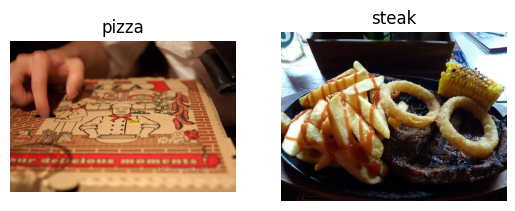

In [ ]:
plt.figure()
plt.subplot(1,2,1)
view_random_image('pizza_steak/train/', "pizza")
plt.subplot(1,2,2)
view_random_image('pizza_steak/train/', 'steak')
plt.show()

### 2. Preprocess the Data (Prepare It for a Model)

Creating a training and test set is one of the most crucial steps in any machine learning project.

In our case, our data is already divided into training and test sets. While creating a validation set could also be an option, we’ll skip that for now.

For an image classification project, it's common practice to organize your data into `train` and `test` directories, with subfolders for each class within these directories.

Let's start by defining the paths to the training and test directories.


In [ ]:
# Define training and test directory paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.08627451, 0.04313726, 0.05882353],
          [0.1137255 , 0.06666667, 0.07450981],
          [0.14901961, 0.09019608, 0.07843138],
          ...,
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412]],
 
         [[0.1254902 , 0.09019608, 0.05490196],
          [0.16862746, 0.11764707, 0.08627451],
          [0.22352943, 0.15686275, 0.1254902 ],
          ...,
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412]],
 
         [[0.13725491, 0.10196079, 0.04313726],
          [0.18039216, 0.1254902 , 0.07450981],
          [0.227451  , 0.16470589, 0.10588236],
          ...,
          [0.05882353, 0.02352941, 0.03529412],
          [0.05882353, 0.02352941, 0.03529412],
          [0.05882353, 0.02352941, 0.03529412]],
 
         ...,
 
         [[0.9490197 , 0.9607844 , 0.8941177 ],
          [0.99215

In [ ]:
# view the labels
labels

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a Model (Start with a Baseline)

You might be wondering about the ideal architecture for your default model.

The truth is, there are many possible answers to this question.

A simple guideline for computer vision models is to start with an architecture that has performed well on [ImageNet](https://www.image-net.org/) (a comprehensive dataset used to benchmark various computer vision models).

However, initially, it's beneficial to construct a smaller model to establish a baseline result that you can aim to enhance.

> 🔑 **Note:** In deep learning, a smaller model typically refers to a model with fewer layers compared to state-of-the-art (SOTA) models. For instance, a smaller model might consist of 3-4 layers, whereas a state-of-the-art model like ResNet50 could have 50+ layers.

In our case, let's implement a simplified version of the model available on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (specifically `model_1` from above) and build a 3-layer convolutional neural network.


In [23]:
# Make the creation of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model (This can be our baseline, a 3-layer CNN)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit a model

Our model is compiled, time to fit it.

You'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 126ms/step - loss: 1.3100 - accuracy: 0.5813 - val_loss: 0.4862 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4944 - accuracy: 0.7753 - val_loss: 0.5345 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3798 - accuracy: 0.8500 - val_loss: 0.3792 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 8s 161ms/step - loss: 0.2115 - accuracy: 0.9207 - val_loss: 0.4421 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.0853 - accuracy: 0.9773 - val_loss: 0.4295 - val_accuracy: 0.8100


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5. Evaluate the model

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

NameError: name 'history_4' is not defined

Judging by our loss curves, it looks like our model is **overfitting** the training dataset.

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [29]:
import matplotlib.pyplot as plt

# plot the validation and training data seperately
def plot_loss_curves(history):
  """
  Return seperate loss curves for training and validation metrics
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.figure(figsize=(12, 6))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='validation loss')
  plt.title('Loss curves')
  plt.xlabel('Epochs')
  plt.ylabel('loss')
  plt.legend();

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('Accuracy curves')
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.legend();

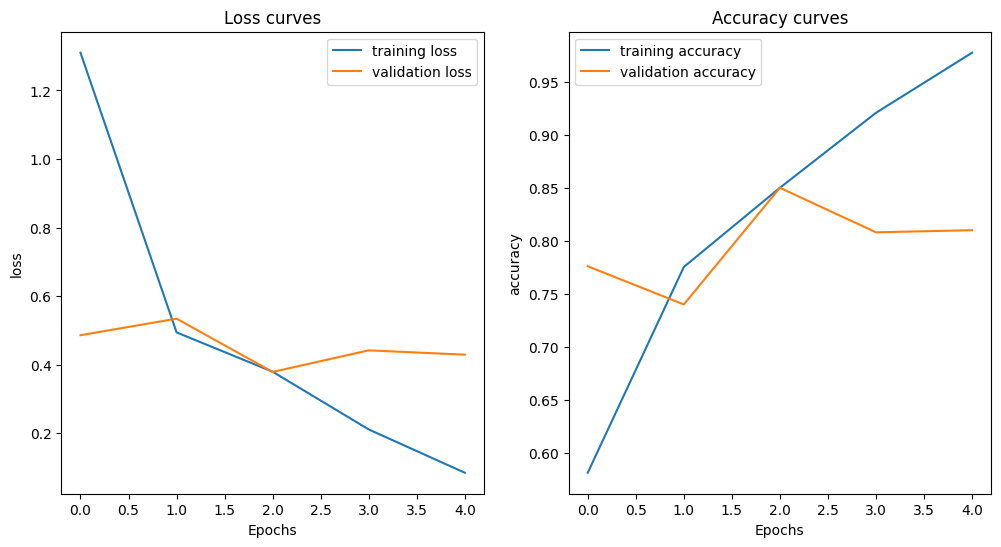

In [ ]:
plot_loss_curves(history_4)

The optimal scenario is for these two curves to closely track each other. Ideally, the validation curve should slightly trail the training curve. A significant gap between the training and validation curves suggests that your model may be overfitting.


### 6. Adjust the Model Parameters

Fitting a machine learning model typically involves three steps:
0. Establish a baseline.
1. Improve upon the baseline by potentially overfitting a larger model.
2. Mitigate overfitting.

So far, we've completed steps 0 and 1.

There are several approaches to further overfitting our model:
* Increasing the number of convolutional layers.
* Adding more convolutional filters.
* Introducing an additional dense layer after the flattened layer.

Instead, our focus will be on aligning our model's training curves better—specifically, we'll tackle step 2.

Why is reducing overfitting important?

When a model performs exceptionally well on training data but poorly on unseen data, it's not practical for real-world applications. For instance, imagine developing a pizza vs. steak food classifier app. If the model excels on our training data but fails on user-submitted food images, it diminishes the app's utility.

For the next iterations of our models, we'll adjust various parameters and monitor the training curves closely.

Specifically, we'll build two more models:
* A Convolutional Neural Network (ConvNet) with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s).
* A ConvNet with max pooling and data augmentation.

The first model will follow a simplified CNN structure:



In [ ]:
# Create model (Our baseline model)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
    ])

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 268ms/step - loss: 0.5961 - accuracy: 0.6887 - val_loss: 0.4686 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4740 - accuracy: 0.7773 - val_loss: 0.4123 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4219 - accuracy: 0.8207 - val_loss: 0.3523 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4029 - accuracy: 0.8220 - val_loss: 0.3952 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3961 - accuracy: 0.8180 - val_loss: 0.3376 - val_accuracy: 0.8460


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       


The output shape in each `MaxPooling2D` layer gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`).

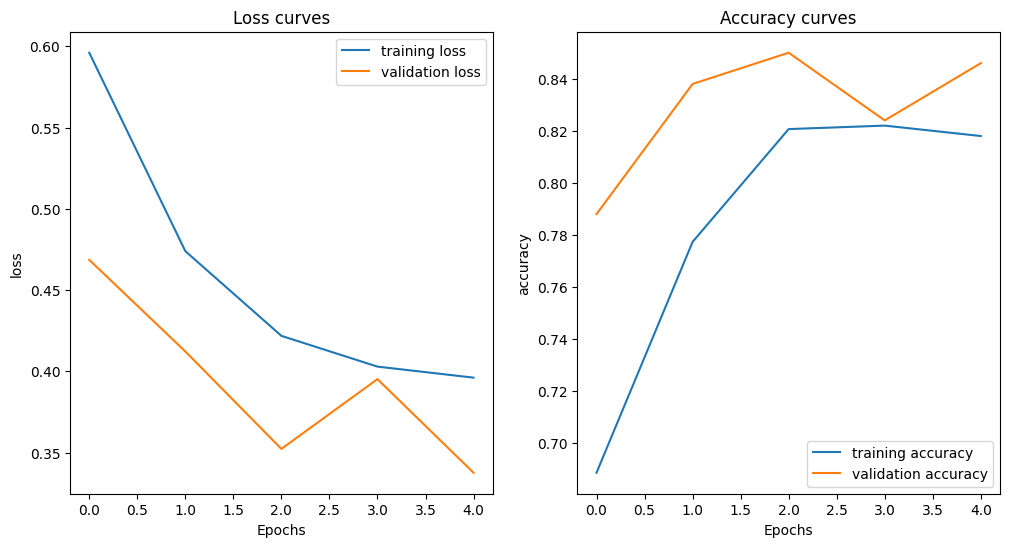

In [ ]:
# plot loss curves of model_5 results
plot_loss_curves(history_5)

We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instances.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, #Rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, #shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

⏩ **What is Data augmentation?**

**Data augmentation** is a technique used to artificially expand the size and variability of a training dataset by applying random transformations to the original data. Common transformations include rotations, translations, flips, shearing, and zooming. This helps prevent overfitting by exposing the model to a wider range of input scenarios. Augmented data enhances model robustness and improves generalization to new, unseen data. It is widely used in training deep learning models, especially for image and text data.


> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size = 32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented batches
print("Non-augmented training images: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images: 
Found 1500 images belonging to 2 classes.
Non-augmented training images: 
Found 1500 images belonging to 2 classes.
Unchanged test images: 
Found 500 images belonging to 2 classes.


How about we see them?

Visualize...

In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False);

NameError: name 'random' is not defined

After examining a sample of the original and augmented images, you can observe some of the example transformations applied to the training images.

Notice how some of the augmented images appear as slightly distorted versions of the original image. This forces our model to learn patterns from imperfect images, which is often the case when dealing with real-world data.

> 🤔 **Question:** Should I use data augmentation? And how much should I augment?

Data augmentation helps prevent a model from overfitting. If your model is overfitting (e.g., the validation loss continues to rise), consider using data augmentation.

As for the extent of data augmentation, there’s no fixed rule. It’s best to explore the options available in the `ImageDataGenerator` class and consider how augmentation might benefit your specific use case.

Now that we have augmented data, let’s refit a model and observe its impact on training.

We’ll use the same model architecture as `model_5`.


In [ ]:
# Create the model (Same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 75s 2s/step - loss: 0.7029 - accuracy: 0.4980 - val_loss: 0.6764 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.7238 - accuracy: 0.4700 - val_loss: 0.6931 - val_accuracy: 0.4940
Epoch 3/5
47/47 [==============================] - 69s 1s/step - loss: 0.6931 - accuracy: 0.5073 - val_loss: 0.6924 - val_accuracy: 0.5400
Epoch 4/5
47/47 [==============================] - 69s 1s/step - loss: 0.6922 - accuracy: 0.5007 - val_loss: 0.6866 - val_accuracy: 0.5700
Epoch 5/5
47/47 [==============================] - 69s 1s/step - loss: 0.6960 - accuracy: 0.5593 - val_loss: 0.6752 - val_accuracy: 0.6840


> 🤔 **Question:** Why didn't our model perform very well on the training set initially?

This happened because when we created `train_data_augmented`, we turned off data shuffling using `shuffle=False`. This means our model was only seeing batches of a single class of images at a time.

For instance, the pizza class gets loaded first because it’s the first class alphabetically. Thus, the model's performance was measured on only one class at a time rather than both classes. The validation data performance improved steadily because it contained shuffled data.

We set `shuffle=False` for demonstration purposes (to plot the same augmented and non-augmented images). To correct this, we should set `shuffle=True` on future data generators.

You might have also noticed that each epoch took longer when training with augmented data compared to non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the `ImageDataGenerator` instance augments the data as it’s loaded into the model. While this method preserves the original images, it also takes more time to load them.

> 🔑 **Note:** One way to speed up dataset manipulation is to explore [TensorFlow's parallel reads and buffered prefetching options](https://www.tensorflow.org/tutorials/images/data_augmentation).


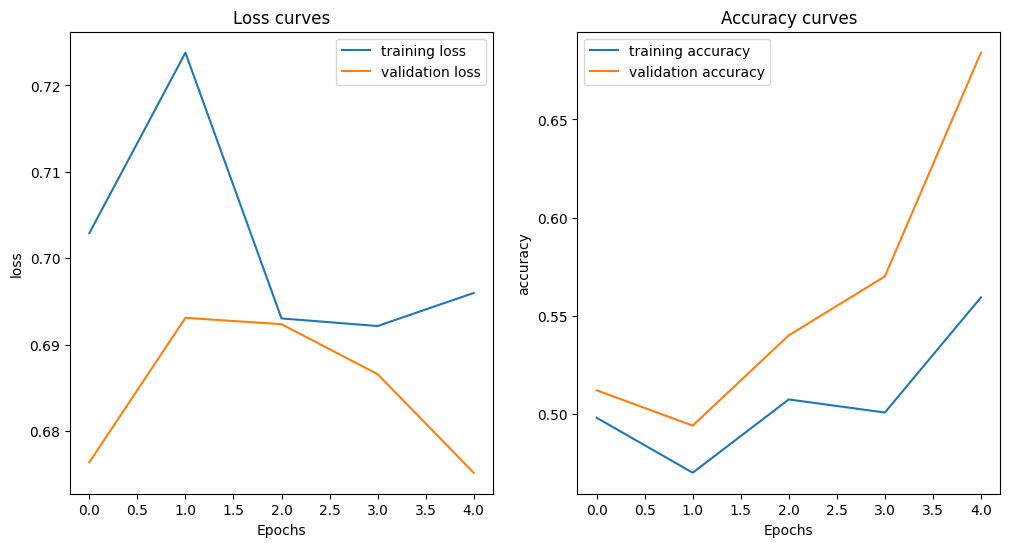

In [ ]:
# plot the loss curves
plot_loss_curves(history_6)

Let's see what happens when we shuffle the augmented training data.

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5, model_6)

model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='relu')
])

# compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 78s 2s/step - loss: 0.8111 - accuracy: 0.5287 - val_loss: 0.6638 - val_accuracy: 0.5700
Epoch 2/5
47/47 [==============================] - 75s 2s/step - loss: 0.6706 - accuracy: 0.6920 - val_loss: 0.8826 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 74s 2s/step - loss: 0.6335 - accuracy: 0.7267 - val_loss: 0.4395 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 73s 2s/step - loss: 0.5817 - accuracy: 0.7547 - val_loss: 0.4367 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 75s 2s/step - loss: 0.6257 - accuracy: 0.7647 - val_loss: 0.4990 - val_accuracy: 0.8020


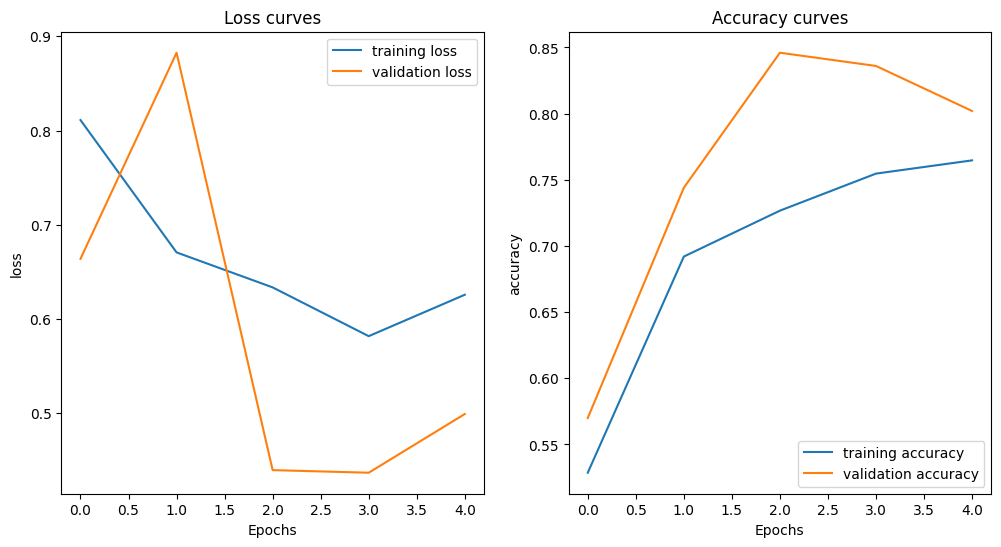

In [ ]:
plot_loss_curves(history_7)

### 7. Repeat Until Satisfied

We've trained a few models on our dataset so far, and their performance has been quite good.

Since we've surpassed our baseline, there are several strategies we could use to further improve our model:
* Increase the number of layers in the model (e.g., add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g., from 10 to 32, 64, or 128; these numbers aren't fixed and are typically determined through trial and error).
* Train for a longer period (more epochs).
* Find an optimal learning rate.
* Acquire more data (providing the model with more learning opportunities).
* Use **transfer learning** to adapt what another image model has learned for our specific use case.

Adjusting these settings (except for the last two) during model development is commonly referred to as **hyperparameter tuning**.

Think of hyperparameter tuning like adjusting the settings on your oven to cook your favorite dish. While your oven does most of the cooking, you can assist it by tweaking the dials.

Let's return to where we started and try our original model (`model_1` or the TinyVGG architecture from the [CNN explainer](https://poloclub.github.io/cnn-explainer/)).


In [ ]:
# Create a CNN model (Same as Tiny VGG but for binary classification)

model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 151s 3s/step - loss: 0.6894 - accuracy: 0.5913 - val_loss: 0.5414 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 131s 3s/step - loss: 0.5590 - accuracy: 0.7107 - val_loss: 0.4187 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 140s 3s/step - loss: 0.5170 - accuracy: 0.7540 - val_loss: 0.3970 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 150s 3s/step - loss: 0.4986 - accuracy: 0.7740 - val_loss: 0.3696 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 162s 3s/step - loss: 0.5007 - accuracy: 0.7773 - val_loss: 0.4030 - val_accuracy: 0.8420


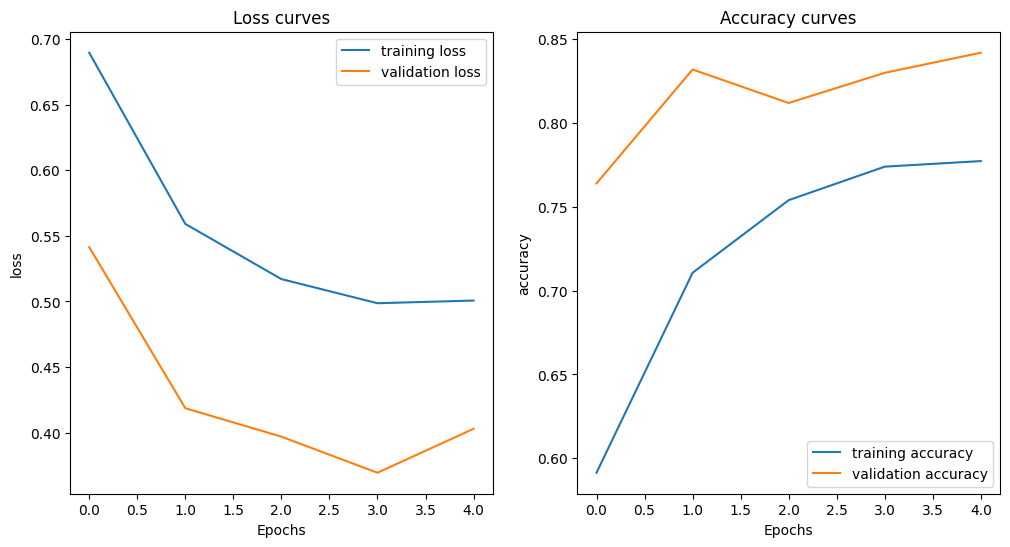

In [ ]:
plot_loss_curves(history_8)

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

### Making a Prediction with Our Trained Model

What’s the use of a trained model if we can’t make predictions with it?

To truly evaluate its performance, we'll upload a few of our own images and see how the model performs.

First, let's remind ourselves of the class names and preview the image we’re going to test.


In [ ]:
# classes we're working with
print(class_names)

['pizza' 'steak']


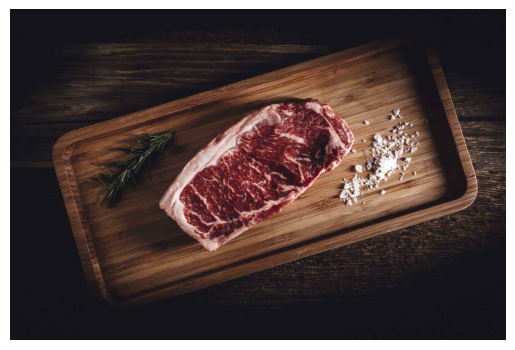

In [ ]:
# view our example image
steak = mpimg.imread("/content/pizza_steak/images/steak.jpg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(1280, 1920, 3)

Since our model requires images of shape `(224, 224, 3)`, we need to reshape our custom image before using it with our model.

We can import and decode our image using [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (for reading files) and [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (for resizing our image and converting it into a tensor).

> 🔑 **Note:** For your model to make accurate predictions on new data, such as your own custom images, the images must be in the same shape as the data the model was trained on. In general terms, to make predictions on custom data, it needs to be in the same format as your training data.


In [ ]:
import tensorflow as tf

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filepath, img_shape=224):
  """
  Reads an image from filepath, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filepath)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [ ]:
# Load and preprocess the custom image
steak = load_and_prep_image("/content/pizza_steak/images/steak.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.07843138, 0.07450981, 0.09411765],
        [0.07843138, 0.07450981, 0.09411765],
        [0.07843138, 0.07450981, 0.09411765],
        ...,
        [0.07843138, 0.07450981, 0.09411765],
        [0.07843138, 0.07450981, 0.09411765],
        [0.07058824, 0.06666667, 0.08627451]],

       [[0.07843138, 0.07450981, 0.09411765],
        [0.07843138, 0.07450981, 0.09411765],
        [0.07843138, 0.07450981, 0.09411765],
        ...,
        [0.07843138, 0.07450981, 0.09411765],
        [0.07843138, 0.07450981, 0.09411765],
        [0.07058824, 0.06666667, 0.08627451]],

       [[0.07843138, 0.07450981, 0.09411765],
        [0.07843138, 0.07450981, 0.09411765],
        [0.07843138, 0.07450981, 0.09411765],
        ...,
        [0.07843138, 0.07450981, 0.09411765],
        [0.07843138, 0.07450981, 0.09411765],
        [0.07058824, 0.06666667, 0.08627451]],

       ...,

       [[0.07843138, 0.07450981, 0.09411765],
        [0.07

There's one more thing we need to address...

Although our image is now the same shape as the images our model was trained on, we're still missing one dimension.

Remember how our model was trained in batches?

The batch size is the first dimension.

So, in reality, our model was trained on data with the shape `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra dimension to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).


In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.07843138, 0.07450981, 0.09411765],
         [0.07843138, 0.07450981, 0.09411765],
         [0.07843138, 0.07450981, 0.09411765],
         ...,
         [0.07843138, 0.07450981, 0.09411765],
         [0.07843138, 0.07450981, 0.09411765],
         [0.07058824, 0.06666667, 0.08627451]],

        [[0.07843138, 0.07450981, 0.09411765],
         [0.07843138, 0.07450981, 0.09411765],
         [0.07843138, 0.07450981, 0.09411765],
         ...,
         [0.07843138, 0.07450981, 0.09411765],
         [0.07843138, 0.07450981, 0.09411765],
         [0.07058824, 0.06666667, 0.08627451]],

        [[0.07843138, 0.07450981, 0.09411765],
         [0.07843138, 0.07450981, 0.09411765],
         [0.07843138, 0.07450981, 0.09411765],
         ...,
         [0.07843138, 0.07450981, 0.09411765],
         [0.07843138, 0.07450981, 0.09411765],
         [0.07058824, 0.06666667, 0.08627451]],

        ...,

        [[0.07843138, 0.07450981, 

In [ ]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 140ms/step


array([[0.5997914]], dtype=float32)

Ahh, the predictions come out in the form of **prediction probabilities**. This means the model outputs how likely the image belongs to one class or another.

Since we're working on a binary classification problem, if the prediction probability is over 0.5, the model predicts the **positive class** (class 1).

If the prediction probability is under 0.5, the model predicts the **negative class** (class 0).

> 🔑 **Note:** The 0.5 cutoff can be adjusted to your preference. For example, you could set the threshold to 0.8 and above for the positive class and 0.2 and below for the negative class. However, changing this will almost always affect your model's performance metrics, so ensure the changes improve the desired metrics.

But referring to positive and negative classes doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So, let's write a function to convert predictions into their class names and then plot the target image.


In [ ]:
# Our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filepath, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filepath)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.figure(figsize=(12,6))
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 75ms/step


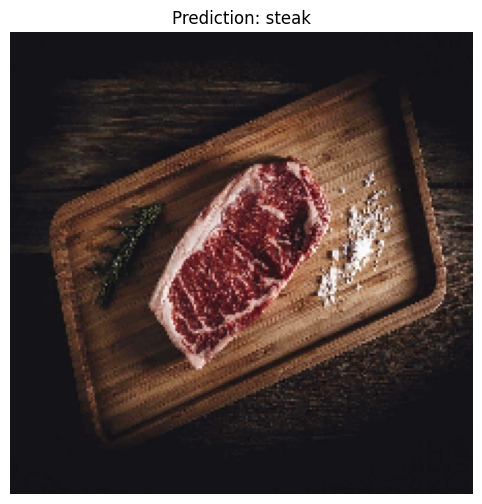

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8,
              filepath="/content/pizza_steak/images/steak.jpg",
              class_names=class_names)

1/1 [==============================] - 0s 64ms/step


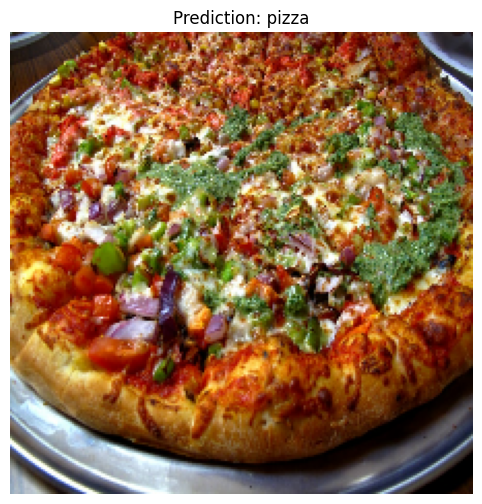

In [ ]:
# Try another image
pred_and_plot(model_8,
              filepath='/content/pizza_steak/images/Pizza.jpeg',
              class_names=class_names)

## Multi-class Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

How about we go through those steps. this time, we'll work with 10 different types of food.

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

### import and become one with the data

Again, we've got a subset of the [Food101 dataset](https://www.kaggle.com/dansbecker/food-101). In addition to the pizza and steak images, we've pulled out another eight classes.


In [1]:
import zipfile
#Download zip file of 10_food_classes images

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded files
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-06-28 21:57:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  31.9MB/s    in 17s     

2024-06-28 21:57:53 (29.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# walk through 10_food_classes directory and list numbers of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 1

In [3]:
# set up the training and test directory paths
train_dir = '10_food_classes_all_data/train/'
test_dir = "10_food_classes_all_data/test/"

In [6]:
# Get the class names for our multiclass dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


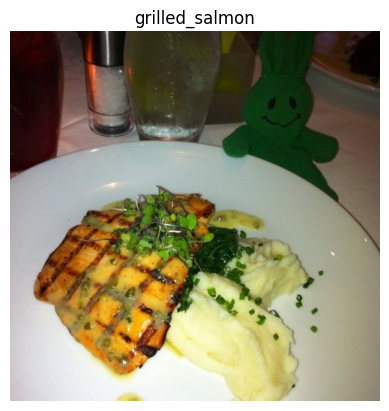

In [14]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir = train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### Preprocess the data
it looks like our data directories are setup correctly.

Time to preprocess the data.

In [16]:
# Create train and test generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [19]:
# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model
We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a few small tweaks.

Namely:
* Changing the output layer to have 10 output neurons (the same number as the number of classes we have).
* Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
* Changing the loss function to `'categorical_crossentropy'` instead of `'binary_crossentropy'`.


In [24]:
# Create a model
mul_model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation='relu'),
    Conv2D(10, 3),
    Activation(activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation='relu'),
    Conv2D(10, 3),
    Activation(activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# compile the model
mul_model_1.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                    metrics=['accuracy'])


### Fit the model

In [26]:
# Fit the model
mul_history_1 = mul_model_1.fit(train_data,
                epochs=5,
                steps_per_epoch = len(train_data),
                validation_data = test_data,
                validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 558s 2s/step - loss: 2.2019 - accuracy: 0.1795 - val_loss: 2.0737 - val_accuracy: 0.2536
Epoch 2/5
235/235 [==============================] - 530s 2s/step - loss: 1.9446 - accuracy: 0.3139 - val_loss: 1.8632 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 524s 2s/step - loss: 1.6830 - accuracy: 0.4265 - val_loss: 1.8448 - val_accuracy: 0.3484
Epoch 4/5
235/235 [==============================] - 542s 2s/step - loss: 1.3261 - accuracy: 0.5561 - val_loss: 2.1069 - val_accuracy: 0.3156
Epoch 5/5
235/235 [==============================] - 528s 2s/step - loss: 0.8142 - accuracy: 0.7400 - val_loss: 2.7425 - val_accuracy: 0.2720


### Evaluate the model

In [27]:
mul_model_1.evaluate(test_data)

79/79 [==============================] - 62s 780ms/step - loss: 2.7425 - accuracy: 0.2720


[2.742471218109131, 0.2720000147819519]

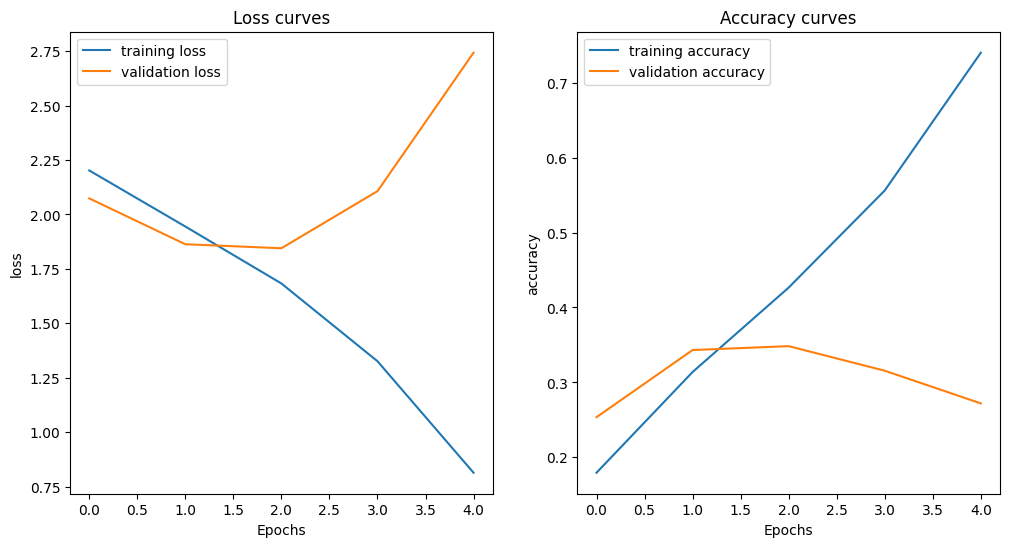

In [30]:
# check the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(mul_history_1)

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### 6. Adjust the model parameters

Although our model performs well on the training data, it's essential to ensure it can generalize to new, unseen data. This is similar to excelling in a classroom but struggling to apply the knowledge in real-world situations.

Ideally, we'd like our model to perform equally well on both the training and test data.

To prevent overfitting, here are a few strategies:

- **Get more data**: More data provides the model with more opportunities to learn diverse patterns, which can help it generalize better to new examples.
- **Simplify the model**: If the current model is overfitting, it might be too complex. Simplifying the model, by reducing the number of layers or hidden units, can help it generalize better.
- **Use data augmentation**: Data augmentation artificially increases the diversity of the training data, making it harder for the model to memorize the training data and helping it generalize better.
- **Use transfer learning**: Transfer learning leverages the patterns learned by a pre-trained model on a large dataset and adapts them to our specific task. For instance, we could use a pre-trained computer vision model and fine-tune it for food image classification.

> 🔑 **Note:** Preventing overfitting is also known as **regularization**.

If obtaining more data isn't feasible, we can focus on the other three options within our notebook.

Let's start by simplifying our model. We'll reduce the number of convolutional layers from four to two.


In [ ]:
# Try a simplified model (removed two layers)
mul_model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

mul_model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

mul_history_2 = mul_model_2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
# Check out the loss curves of model_10
plot_loss_curves(mul_history_2)


How about **data augmentation**?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instance, this time adding some parameters such as `rotation_range` and `horizontal_flip` to manipulate our images.

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Now that we have augmented data, let's see how it performs with the same model as before (`mul_model_2`).

Instead of rewriting the model from scratch, we can use a handy function in TensorFlow called [`clone_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model). This function takes an existing model and rebuilds it in the same format.

The cloned version won't include any of the weights (patterns) that the original model has learned. So when we train it, it will be like training a model from scratch.

> 🔑 **Note:** One of the key practices in deep learning and machine learning, in general, is to **be a serial experimenter**. That's what we're doing here. We try something, see if it works, then try something else. A good experiment setup also keeps track of the things you change. For example, we're using the same model as before but with different data. The model stays the same, but the data changes. This will help us determine if augmented training data has any influence on performance.


In [ ]:
# clone the model (use the same architecture)
mul_model_3 = tf.keras.model.clone_model(mul_model_2)

# Compile the cloned model (same setup as used for model_10)
mul_model_3.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                    metrics=['accuracy'])

# fit the model
mul_history_3 = mul_model_3.fit(train_data_augmented,
                                epochs=5,
                                steps_per_epoch=len(train_data_augmented),
                                validation_data = test_data,
                                validation_steps = len(test_data))

You can see that each epoch takes longer than with the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, which increases the amount of time between each epoch.

> **Note:** One way to reduce this time is to use augmentation layers directly as part of the model. For example, with [`tf.keras.layers.RandomFlip`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip). You can also speed up data loading with the newer [`tf.keras.utils.image_dataset_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) image loading API (we will cover this later in the course).

How do our model's training curves look?


In [ ]:
# check out our model's performance with augmented data
plot_loss_curves(mul_history_3)

### 7. Repeat until satisfied

We could keep going here: restructuring our model's architecture, adding more layers, adjusting the learning rate, trying different methods of data augmentation, and training for longer. But as you can imagine, this could take a fairly long time.

Fortunately, there's one trick we haven't tried yet: **transfer learning**.

However, we'll save that for the next notebook where you'll see how we can leverage the patterns another model has learned for our own task, rather than designing our own models from scratch.

In the meantime, let's make a prediction with our trained multi-class model.


## Making a prediction with our trained model